## EDA NOTEBOOK  -- M5 Demand Forecasting

In [4]:
# import the important Packages

import pandas as pd
import numpy  as np
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go

In [ ]:
# Download The Data from the Kaggle Website

#!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615172125&Signature=DtMNuql15nb04EL84klT2LWUWqfujmx%2FlkEOcrWRjiCpa%2B3mq8pTbKgRQ10ZO163QN6%2FBkBXTj9OgV8KDXtETHiH9bGY%2FFjnrjHqYEB76STHCGWZx9zVp3p%2FmsPaLQN4tlEkUBO%2B78uBaWJIfna%2BjWh8D01OmQU7sRbY3mhHmArFmvXcE9nUe0BPcNk1cMEkqMxzqXnCQGPWQs70J3TzEycido7KJDfS7wP2XWguJFO0Dknxo%2FDVbPIleGK%2BxFktYdxzVehYIGYjekq4QCLP8j2GgNe%2BeA771SmtsblHjNrmF%2BHydQW82oPfefR7gs%2FcMRXUEi69giXzcf4nYfNwFw%3D%3D&response-content-disposition=attachment%3B+filename%3Dm5-forecasting-accuracy.zip" -c -O 'm5-forecasting-accuracy.zip'

In [ ]:
# Unzip the Data

#!unzip m5-forecasting-accuracy.zip

### 1. Read the Data

In [ ]:
# Read All the Data using Pandas DataFrame


Sales_Data = pd.read_csv("sales_train_evaluation.csv")
Price_Data = pd.read_csv("sell_prices.csv")
Calander_Data = pd.read_csv("calendar.csv")

print("Number of Rows And Column in Sales Data ",Sales_Data.shape)
print("Number of Rows And Column in Price_Data ",Price_Data.shape)
print("Number of Rows And Column in Calander_Data ",Calander_Data.shape)

Number of Rows And Column in Sales Data  (30490, 1947)
Number of Rows And Column in Price_Data  (6841121, 4)
Number of Rows And Column in Calander_Data  (1969, 14)


### 2. DownCasting the Data

In [ ]:
# Refrence --->>>   https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling/notebook#2.-Downcasting
# Downcast is Used to reduced the amount of RAM used by DataFrames

In [ ]:
sales_b_d=Sales_Data.memory_usage().sum()
sales_b_d=np.round(sales_b_d/(1024*1024),1)

cal_b_d=Calander_Data.memory_usage().sum()
cal_b_d=np.round(cal_b_d/(1024*1024),1)

prices_b_d=Price_Data.memory_usage().sum()
prices_b_d=np.round(prices_b_d/(1024*1024),1)

print("Ram Used by Sales Data {0}",sales_b_d," MB")
print("Ram Used by Calander Data ",cal_b_d," MB")
print("Ram Used by Price Data ",prices_b_d," MB")

Ram Used by Sales Data {0} 452.9  MB
Ram Used by Calander Data  0.2  MB
Ram Used by Price Data  208.8  MB


In [ ]:
def downcast(df):

    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()

    for i,t in enumerate(types):

        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)

        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)

        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')

    return df  

In [ ]:
Sales_Data = downcast(Sales_Data)
Calander_Data = downcast(Calander_Data)
Price_Data = downcast(Price_Data)

In [ ]:
sales_a_d=Sales_Data.memory_usage().sum()
sales_a_d=np.round(sales_a_d/(1024*1024),1)

cal_a_d=Calander_Data.memory_usage().sum()
cal_a_d=np.round(cal_a_d/(1024*1024),1)

prices_a_d=Price_Data.memory_usage().sum()
prices_a_d=np.round(prices_a_d/(1024*1024),1)

In [ ]:
dic = {'df':['Sales_Data','Calander_Data','Price_Data'],
       'Before downcasting':[sales_b_d,cal_b_d,prices_b_d],
       'After downcasting':[sales_a_d,cal_a_d,prices_a_d]}

df = pd.DataFrame(dic)
memory_decrease=(df["Before downcasting"]-df["After downcasting"])/df["Before downcasting"]
memory_decrease=memory_decrease*100

df["memory_decrease"] = memory_decrease
df

df  Before downcasting  After downcasting  memory_decrease
0     Sales_Data               452.9               96.6        78.670788
1  Calander_Data                 0.2                0.1        50.000000
2     Price_Data               208.8               45.8        78.065134

**Observations-----**
 <font color='green'>
1. The size of all DataFrames reduced by around 75 Percent.
2. It reduced the chances of a 'RAM crashed' error. 
</font>

### 3. Basic Information About Data 

In [ ]:
print('Number of States:',len(Sales_Data['state_id'].unique()))
print('Name of States:',Sales_Data['state_id'].unique())
print("  "*50)
print("*"*50)

print('Number Stores:',len(Sales_Data['store_id'].unique()))
print('Name of Stores:',Sales_Data['store_id'].unique())
print("  "*50)
print("*"*50)

print('Number of Categories:',len(Sales_Data['cat_id'].unique()))
print('Name of Categories:',Sales_Data['cat_id'].unique())
print("  "*50)
print("*"*50)

print('Number of Deptartments:',len(Sales_Data['dept_id'].unique()))
print('Name of Deptartments:',Sales_Data['dept_id'].unique())
print("  "*50)
print("*"*50)

print('Number of Items:',len(Sales_Data['item_id'].unique()))

Number of States: 3
Name of States: ['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']
                                                                                                    
**************************************************
Number Stores: 10
Name of Stores: ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']
                                                                                                    
**************************************************
Number of Categories: 3
Name of Categories: ['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['HOBBIES', 'HOUSEHOLD', 'FOODS']
                                                                                                    
**************************************************
Number of Deptartments: 7
Name of Deptartments: ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD

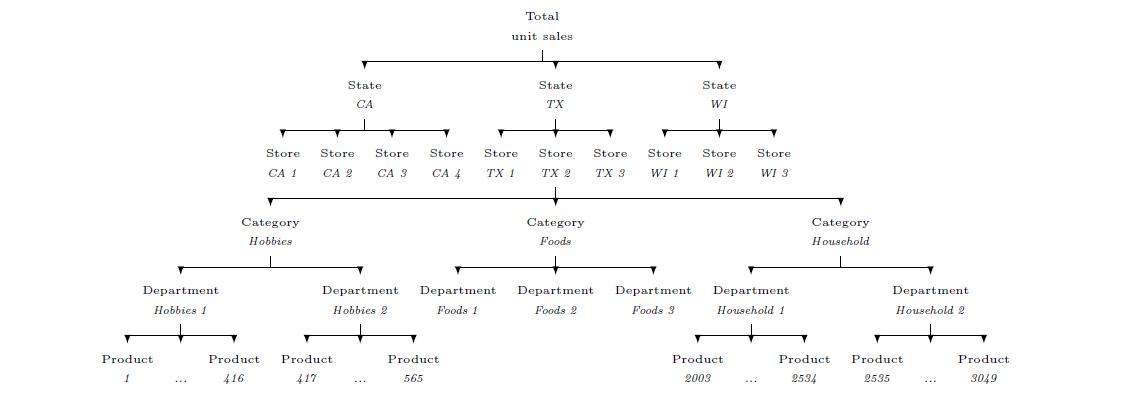

In [ ]:
Sales_Data.head()

id        item_id  ... d_1940 d_1941
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...      0      1
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...      0      0
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...      0      1
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...      2      6
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...      1      0

[5 rows x 1947 columns]

**Observations-----**
 <font color='green'>
1. We have sales Data for 1941 Days.
2. Most of the entries are zero it means that we didn't sell any product on that Particular Day.
</font>

In [ ]:
Calander_Data.head()

date  wm_yr_wk    weekday  wday  ...  event_type_2  snap_CA snap_TX snap_WI
0 2011-01-29     11101   Saturday     1  ...           NaN        0       0       0
1 2011-01-30     11101     Sunday     2  ...           NaN        0       0       0
2 2011-01-31     11101     Monday     3  ...           NaN        0       0       0
3 2011-02-01     11101    Tuesday     4  ...           NaN        1       1       0
4 2011-02-02     11101  Wednesday     5  ...           NaN        1       0       1

[5 rows x 14 columns]

**Observations-----**
 <font color='green'>
1. We have got Events Information And Snap Days Information.
2. People often do shopping on Festivals Days. So it's very important Information Especially for Retail And Fashion Industry.
3. SNAP is a federal program that helps millions of low-income Americans put food on the table. On Snap Days you could see more sales of Food items.
</font>

In [ ]:
Price_Data.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325    9.578125
1     CA_1  HOBBIES_1_001     11326    9.578125
2     CA_1  HOBBIES_1_001     11327    8.257812
3     CA_1  HOBBIES_1_001     11328    8.257812
4     CA_1  HOBBIES_1_001     11329    8.257812

**Observations-----**
 <font color='green'>
1. We Have Price Information of a Product.
2. It may Change Based on Discount or Promotion.

In [ ]:
# Convert Wide Format to Long Format Our Sales Data

# Ref -->> https://pandas.pydata.org/docs/reference/api/pandas.melt.html

Sales_Data_L = pd.melt(Sales_Data, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id','state_id'], var_name='d', value_name='Number_of_Product_Sold').dropna()

In [ ]:
# Number of Data points in Sales Data in Long Format

Sales_Data_L.shape

(59181090, 8)

In [ ]:
Sales_Data_L.head()

id        item_id  ...    d Number_of_Product_Sold
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...  d_1                      0
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...  d_1                      0
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...  d_1                      0
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...  d_1                      0
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...  d_1                      0

[5 rows x 8 columns]

In [ ]:
# Join Sales_Data And Calander dataframe Using Comman Column d

Sales_Data_Cal = pd.merge(Sales_Data_L, Calander_Data, how = "left", on = 'd')

In [ ]:
Sales_Data_Cal.shape

(59181090, 21)

In [ ]:
Sales_Data_Cal.head()

id        item_id  ... snap_TX snap_WI
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...       0       0
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...       0       0
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...       0       0
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...       0       0
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...       0       0

[5 rows x 21 columns]

In [ ]:
# Join Sales_Data_Cal And Price_Data dataframe Using Comman Store,Product Id,wm_yr_wk

Sales_Data_Cal_Price = pd.merge(Sales_Data_Cal, Price_Data, how = 'left', on = ['store_id','item_id','wm_yr_wk'])


In [ ]:
Sales_Data_Cal_Price.shape

(59181090, 22)

In [ ]:
Sales_Data_Cal_Price.head()

id        item_id  ... snap_WI sell_price
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...       0        NaN
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...       0        NaN
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...       0        NaN
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...       0        NaN
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...       0        NaN

[5 rows x 22 columns]

In [ ]:
# Target Variable Bird View Analysis

word_count  = Sales_Data_Cal_Price['Number_of_Product_Sold'].value_counts()
word_dict = dict(word_count)
word_dict

{0: 40241819,
 1: 7923638,
 2: 3978131,
 3: 2141754,
 4: 1305655,
 5: 828695,
 6: 576536,
 7: 401045,
 8: 305787,
 9: 226692,
 10: 182056,
 11: 142722,
 12: 124102,
 13: 96062,
 14: 80822,
 15: 68074,
 16: 58190,
 17: 48846,
 18: 42553,
 19: 36587,
 20: 32881,
 21: 28431,
 22: 25238,
 23: 22335,
 24: 22201,
 25: 18402,
 26: 16435,
 27: 14800,
 28: 13413,
 29: 11940,
 30: 11029,
 31: 10063,
 32: 9174,
 33: 8327,
 34: 7693,
 35: 7202,
 36: 6822,
 37: 6111,
 38: 5640,
 39: 5014,
 40: 4967,
 41: 4449,
 42: 4311,
 43: 3888,
 44: 3643,
 45: 3348,
 46: 3206,
 47: 2896,
 48: 3084,
 49: 2727,
 50: 2501,
 51: 2304,
 52: 2301,
 53: 2018,
 54: 1945,
 55: 1928,
 56: 1808,
 57: 1702,
 58: 1608,
 59: 1434,
 60: 1458,
 61: 1323,
 62: 1191,
 63: 1102,
 64: 1090,
 65: 1050,
 66: 1011,
 67: 987,
 68: 861,
 69: 882,
 70: 816,
 71: 756,
 72: 773,
 73: 729,
 74: 657,
 75: 622,
 76: 610,
 77: 644,
 78: 564,
 79: 543,
 80: 544,
 81: 496,
 82: 499,
 83: 413,
 84: 402,
 85: 414,
 86: 415,
 87: 353,
 88: 368,
 8

**Observations-----**
 <font color='green'>
1. Most Target Values are 0 and 1.
2. It's a Regression Problem.
3. There are lots of Outliers also, You can Remove these outliers while making a model.

### 4. EDA of Sales Data

 ####  <font color='RED'>  4.1 Total Sales of Each State

In [ ]:
#  ref -->>  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

total_sold_Product = Sales_Data_Cal_Price['Number_of_Product_Sold'].sum()

x = Sales_Data_Cal_Price[['state_id','Number_of_Product_Sold']]
x = x.groupby(['state_id']).sum()
x.reset_index(level=0,inplace=True)
print(x)
print("  "*50)
print("**"*50)

x['Number_of_Product_Sold'] = x['Number_of_Product_Sold']/total_sold_Product

px.bar(x, x="state_id", y="Number_of_Product_Sold", color="state_id", title="State Total sales")

  state_id  Number_of_Product_Sold
0       CA              29196717.0
1       TX              19228405.0
2       WI              18502051.0
                                                                                                    
****************************************************************************************************


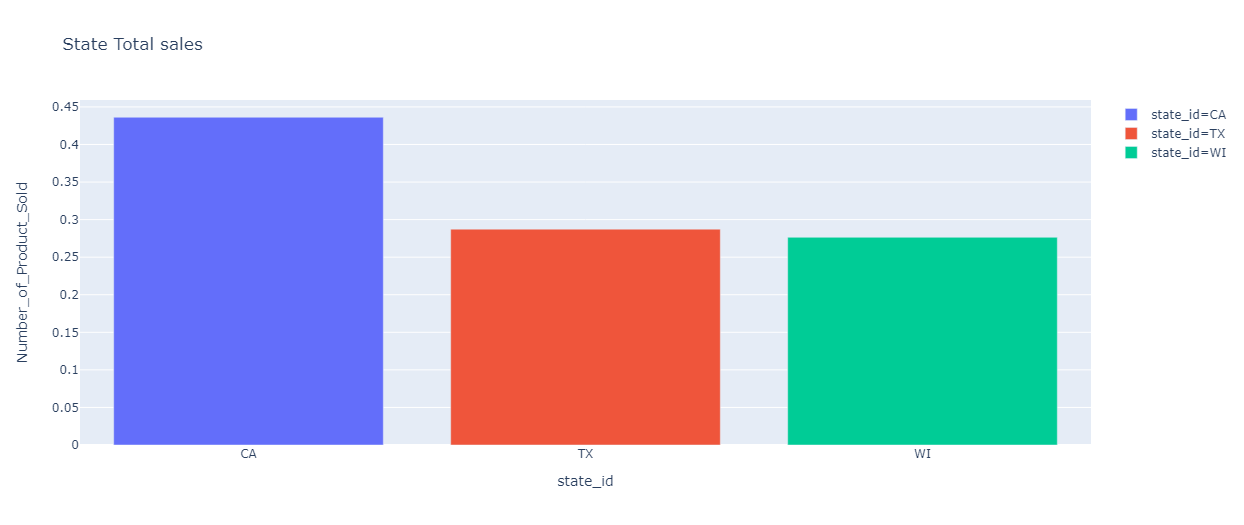

In [ ]:
Image(filename='All_Photos/4.1_Photo.png') 

**Observations-----**
 <font color='green'>
1. Total Sales of California State is Maximum.
2. California is the most populous USA States and we included four Stores of CA and three-2 Stores of TX And WI.

 ####  <font color='RED'>  4.2 Total Sales of Each Stores

In [ ]:
total_sold_Product = Sales_Data_Cal_Price['Number_of_Product_Sold'].sum()

x = Sales_Data_Cal_Price[['store_id','Number_of_Product_Sold']]
x = x.groupby(['store_id']).sum()
x.reset_index(level=0,inplace=True)
print(x)
print("  "*50)
print("**"*50)

x['Number_of_Product_Sold'] = x['Number_of_Product_Sold']/total_sold_Product

px.bar(x, x="store_id", y="Number_of_Product_Sold", color="store_id", title="Store Total sales")

  store_id  Number_of_Product_Sold
0     CA_1               7832248.0
1     CA_2               5818395.0
2     CA_3              11363540.0
3     CA_4               4182534.0
4     TX_1               5692823.0
5     TX_2               7329642.0
6     TX_3               6205940.0
7     WI_1               5261506.0
8     WI_2               6697988.0
9     WI_3               6542557.0
                                                                                                    
****************************************************************************************************


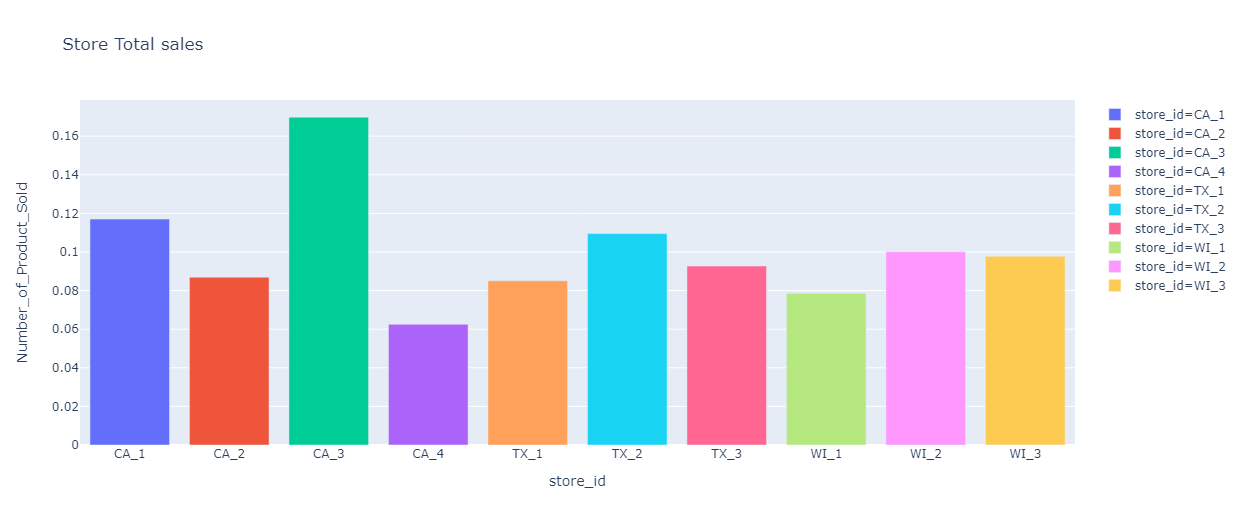

In [ ]:
Image(filename='All_Photos/4.2_Photo.png') 

**Observations-----**
 <font color='green'>
1. Total Sales of CA_3 Store is Maximum.
2. There are not many total Sales between Another Stores.
3. Total Sales of CA_4 Store is MINIMUM. Might be they open this Store Recently or it is located in Some Remote Area.
4. California is Developing very Fast or Lot's of People Moving From Rural Area to Urban Area.

 ####  <font color='RED'>  4.3 Category Wise Total Sales

In [ ]:
total_sold_Product = Sales_Data_Cal_Price['Number_of_Product_Sold'].sum()

x = Sales_Data_Cal_Price[['cat_id','Number_of_Product_Sold']]
x = x.groupby(['cat_id']).sum()
x.reset_index(level=0,inplace=True)
print(x)
print("  "*50)
print("**"*50)

x['Number_of_Product_Sold'] = x['Number_of_Product_Sold']/total_sold_Product

px.bar(x, x="cat_id", y="Number_of_Product_Sold", color="cat_id", title="Category Total Sale")

      cat_id  Number_of_Product_Sold
0      FOODS              45922427.0
1    HOBBIES               6240656.0
2  HOUSEHOLD              14764090.0
                                                                                                    
****************************************************************************************************


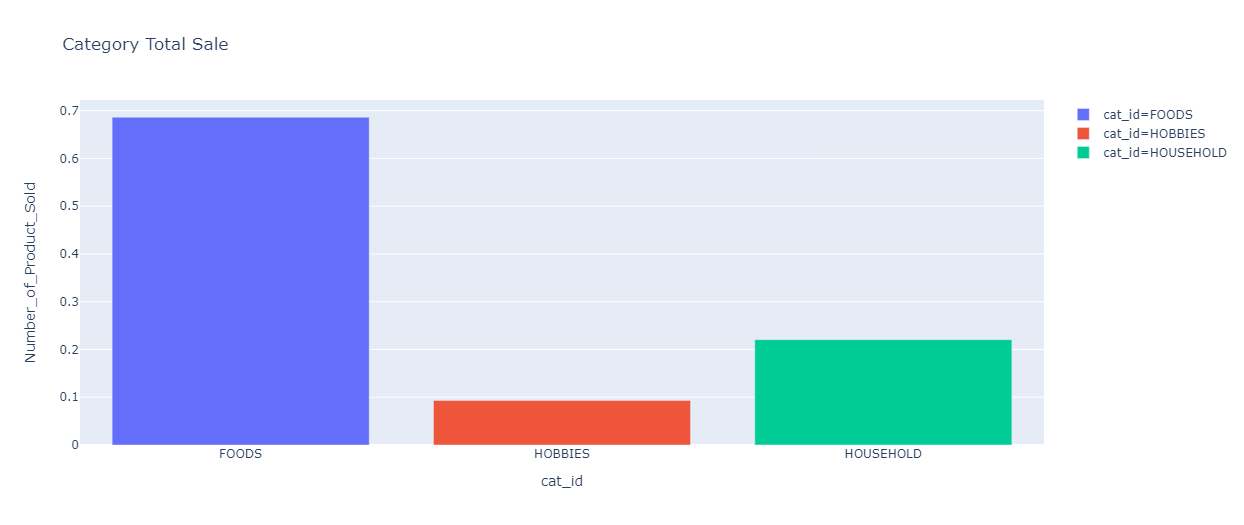

In [ ]:
Image(filename='All_Photos/4.3_Photo.png') 

**Observations-----**
 <font color='green'>
1. For Food Category Sales is Maximum.
2. Food is our Daily Requirement Thats'why this Category sale is Maximum.

 ####  <font color='RED'>  4.4 State Wise Category  Total Sales

In [ ]:
x = Sales_Data_Cal_Price[['state_id','cat_id','Number_of_Product_Sold']]
grouped = x.groupby(['state_id','cat_id'], as_index=False).sum()

print(grouped)
print("  "*50)
print("**"*50)


x = grouped['state_id'].unique()
y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']



fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in each state for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()


  state_id     cat_id  Number_of_Product_Sold
0       CA      FOODS              19535863.0
1       CA    HOBBIES               3095587.0
2       CA  HOUSEHOLD               6565267.0
3       TX      FOODS              13172106.0
4       TX    HOBBIES               1624130.0
5       TX  HOUSEHOLD               4432169.0
6       WI      FOODS              13214458.0
7       WI    HOBBIES               1520939.0
8       WI  HOUSEHOLD               3766654.0
                                                                                                    
****************************************************************************************************


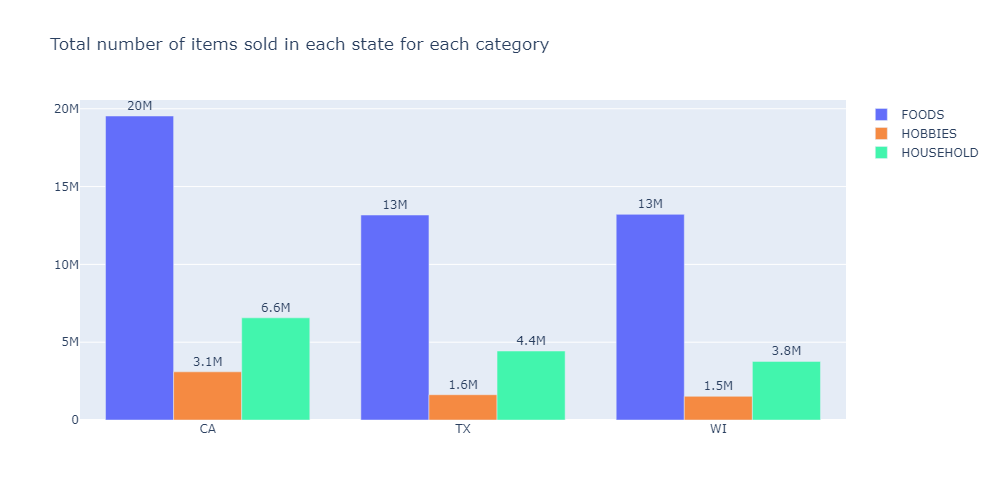

In [ ]:
Image(filename='All_Photos/4.4_Photo.png') 

**Observations-----**
 <font color='green'>
1. California State Sold Maximum Items in Every Category.
2. TX and WI State Sold Similar items in Food Category.

 ####  <font color='RED'>  4.5 Store Wise Category  Total Sales

In [ ]:
x = Sales_Data_Cal_Price[['store_id','cat_id','Number_of_Product_Sold']]
grouped = x.groupby(['store_id','cat_id'], as_index=False).sum()

print(grouped)
print("  "*50)
print("**"*50)


x = grouped['store_id'].unique()
y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']


fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in each Store for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()


   store_id     cat_id  Number_of_Product_Sold
0      CA_1      FOODS               5471661.0
1      CA_1    HOBBIES                892083.0
2      CA_1  HOUSEHOLD               1468504.0
3      CA_2      FOODS               3567477.0
4      CA_2    HOBBIES                650360.0
5      CA_2  HOUSEHOLD               1600558.0
6      CA_3      FOODS               7625660.0
7      CA_3    HOBBIES                977613.0
8      CA_3  HOUSEHOLD               2760267.0
9      CA_4      FOODS               2871065.0
10     CA_4    HOBBIES                575531.0
11     CA_4  HOUSEHOLD                735938.0
12     TX_1      FOODS               3840554.0
13     TX_1    HOBBIES                437433.0
14     TX_1  HOUSEHOLD               1414836.0
15     TX_2      FOODS               5091362.0
16     TX_2    HOBBIES                647815.0
17     TX_2  HOUSEHOLD               1590465.0
18     TX_3      FOODS               4240190.0
19     TX_3    HOBBIES                538882.0
20     TX_3  

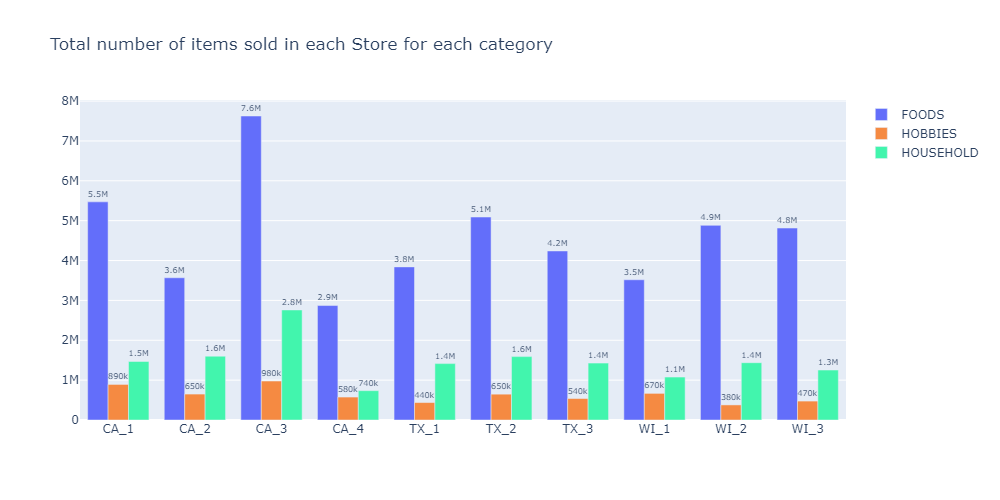

In [ ]:
Image(filename='All_Photos/4.5_Photo.png') 

**Observations-----**
 <font color='green'>
1. CA_3 Store Sold Maximum in All The Categories.
2. In the Hobbies Category, there is not much Difference Between the Stores.
3. CA_4 Stores have less Sell in all the Categories.
4. There are not many variations Between Wi And TX Stores.

 ####  <font color='RED'>  4.6 Year Wise STATE  Total Sales

In [ ]:
x1 = Sales_Data_Cal_Price[['state_id','year','Number_of_Product_Sold']]
grouped = x1.groupby(['state_id','year'], as_index=False).sum()

print(grouped)
print("  "*50)
print("**"*50)

x = grouped['state_id'].unique()

y1_2011 = grouped[(grouped['year'] == 2011)]['Number_of_Product_Sold']
y1_2012 = grouped[(grouped['year'] == 2012)]['Number_of_Product_Sold']
y1_2013 = grouped[(grouped['year'] == 2013)]['Number_of_Product_Sold']
y1_2014 = grouped[(grouped['year'] == 2014)]['Number_of_Product_Sold']
y1_2015 = grouped[(grouped['year'] == 2015)]['Number_of_Product_Sold']
y1_2016 = grouped[(grouped['year'] == 2016)]['Number_of_Product_Sold']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_2011,
    name='2011',text = y1_2011
))
fig.add_trace(go.Bar(
    x=x,
    y=y1_2012,
    name='2012', text = y1_2012,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y1_2013,
    name='2013	', text = y1_2013,
    marker_color='rgb(66, 245, 173)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y1_2014,
    name='2014',text = y1_2014,
    marker_color='rgb(191, 0, 255)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y1_2015,
    name='2015', text = y1_2015,
    marker_color='rgb(153, 102, 102)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y1_2016,
    name='2016', text = y1_2016,
    marker_color='rgb(249, 6, 6)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in each Year for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()

   state_id  year  Number_of_Product_Sold
0        CA  2011               3943802.0
1        CA  2012               5268487.0
2        CA  2013               5733801.0
3        CA  2014               5748876.0
4        CA  2015               5967138.0
5        CA  2016               2534613.0
6        TX  2011               2711159.0
7        TX  2012               3611531.0
8        TX  2013               3778059.0
9        TX  2014               3673215.0
10       TX  2015               3858923.0
11       TX  2016               1595518.0
12       WI  2011               2201624.0
13       WI  2012               3181819.0
14       WI  2013               3623893.0
15       WI  2014               3667685.0
16       WI  2015               3974750.0
17       WI  2016               1852280.0
                                                                                                    
****************************************************************************************************


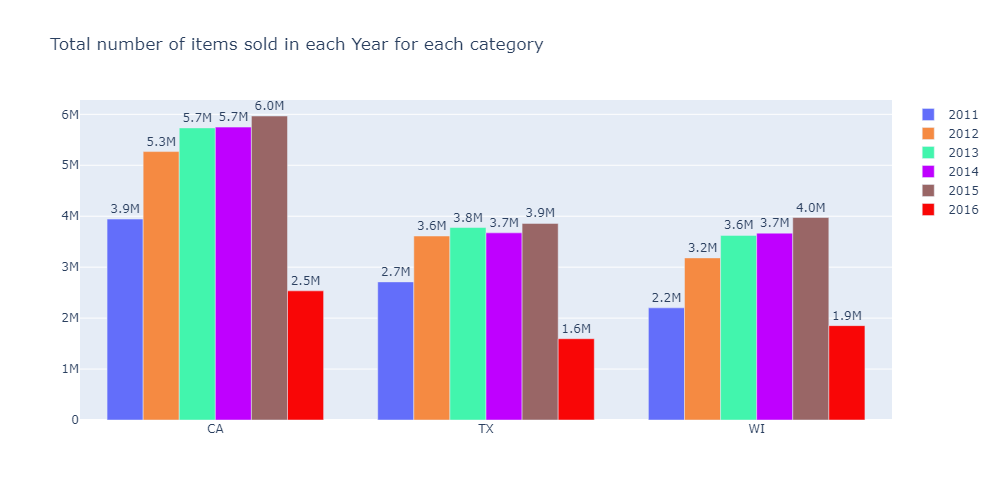

In [ ]:
Image(filename='All_Photos/4.6_Photo.png') 

**Observations-----**
 <font color='green'>
1. the Year 2015 Sales are Maximum Across All The Stores.
2. In 2016 and 2011 we don't have 12 months of data that's why Sales are less.
3. Sales are increasing year by year So Walmart is a profitable company.

 ####  <font color='RED'>  4.7 Day Wise STATE  Total Sales 

In [ ]:
x = Sales_Data_Cal_Price[['wday','cat_id','Number_of_Product_Sold']]
grouped = x.groupby(['wday','cat_id'], as_index=False).sum()

print(grouped)
print("  "*50)
print("**"*50)


x = [ 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']



fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in each Day for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()


    wday     cat_id  Number_of_Product_Sold
0      1      FOODS               7832803.0
1      1    HOBBIES               1097354.0
2      1  HOUSEHOLD               2664186.0
3      2      FOODS               7911666.0
4      2    HOBBIES                995802.0
5      2  HOUSEHOLD               2575058.0
6      3      FOODS               6323924.0
7      3    HOBBIES                828896.0
8      3  HOUSEHOLD               1986776.0
9      4      FOODS               5843430.0
10     4    HOBBIES                793056.0
11     4  HOUSEHOLD               1812148.0
12     5      FOODS               5755339.0
13     5    HOBBIES                801305.0
14     5  HOUSEHOLD               1789482.0
15     6      FOODS               5787835.0
16     6    HOBBIES                800860.0
17     6  HOUSEHOLD               1810233.0
18     7      FOODS               6467430.0
19     7    HOBBIES                923383.0
20     7  HOUSEHOLD               2126207.0
                                

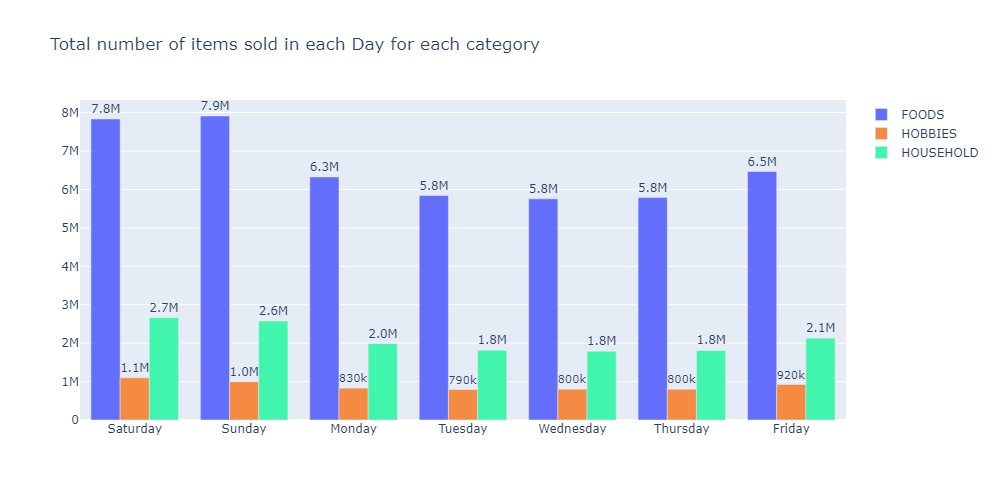

In [ ]:
Image(filename='All_Photos/4.7_Photo.png') 

**Observations-----**
 <font color='green'>
1. People buy more Products on weekends Comparision to weekdays.
2. we are selling most of the items from the Food Category on Weekends, So lot's of Working Person are there in that Area.

 ####  <font color='RED'>  4.8 Total Sales on Events Type  

In [ ]:
x1 = Sales_Data_Cal_Price[['event_type_1','cat_id','Number_of_Product_Sold']]
grouped = x1.groupby(['event_type_1','cat_id'], as_index=False).sum()
print(grouped)

print(grouped)
print("  "*50)
print("**"*50)

x = grouped['event_type_1'].unique()

y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']



fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in Event Type for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1200, height=500)
fig.show()


   event_type_1     cat_id  Number_of_Product_Sold
0      Cultural      FOODS                892947.0
1      Cultural    HOBBIES                117558.0
2      Cultural  HOUSEHOLD                274083.0
3      National      FOODS               1051624.0
4      National    HOBBIES                125577.0
5      National  HOUSEHOLD                325183.0
6     Religious      FOODS               1276396.0
7     Religious    HOBBIES                174094.0
8     Religious  HOUSEHOLD                408527.0
9      Sporting      FOODS                405483.0
10     Sporting    HOBBIES                 49769.0
11     Sporting  HOUSEHOLD                117485.0
   event_type_1     cat_id  Number_of_Product_Sold
0      Cultural      FOODS                892947.0
1      Cultural    HOBBIES                117558.0
2      Cultural  HOUSEHOLD                274083.0
3      National      FOODS               1051624.0
4      National    HOBBIES                125577.0
5      National  HOUSEHOLD     

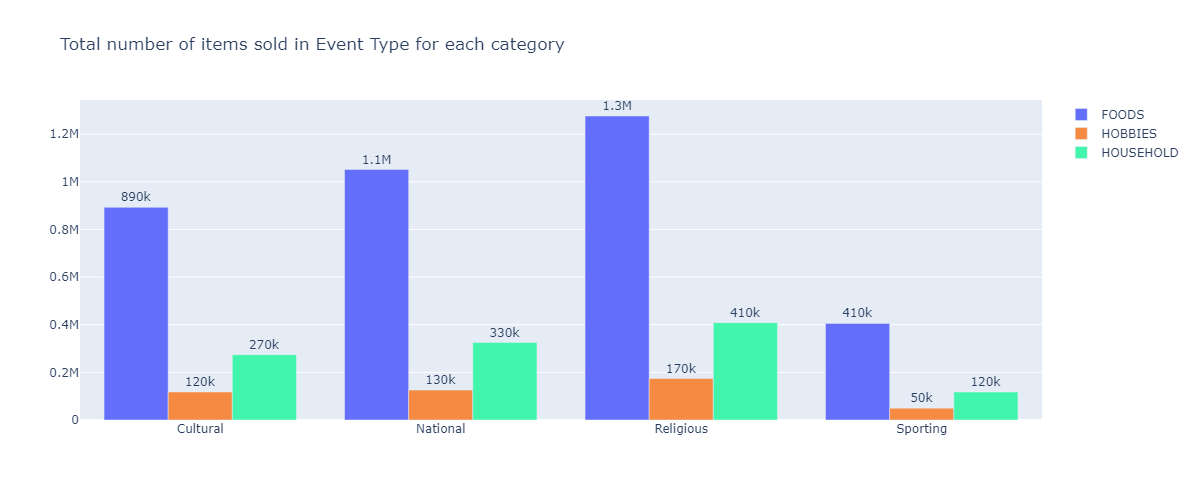

In [ ]:
Image(filename='All_Photos/4.8_Photo.png') 

**Observations-----**
 <font color='green'>
1. We have Maximum Sales on Religious Type Events 
2. People buy lots of Food items on Festivals And Holidays.

 ####  <font color='RED'>  4.9 Total Sales on Events/Festivals 

---



In [ ]:
x1 = Sales_Data_Cal_Price[['event_name_1','cat_id','Number_of_Product_Sold']]
grouped = x1.groupby(['event_name_1','cat_id'], as_index=False).sum()
print(grouped)

print(grouped)
print("  "*50)
print("**"*50)

x = grouped['event_name_1'].unique()

y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']



fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold in Events for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=2500, height=500)
fig.show()


     event_name_1     cat_id  Number_of_Product_Sold
0    Chanukah End      FOODS                116921.0
1    Chanukah End    HOBBIES                 15469.0
2    Chanukah End  HOUSEHOLD                 34744.0
3       Christmas      FOODS                    77.0
4       Christmas    HOBBIES                     0.0
..            ...        ...                     ...
85  ValentinesDay    HOBBIES                 18544.0
86  ValentinesDay  HOUSEHOLD                 42380.0
87    VeteransDay      FOODS                123991.0
88    VeteransDay    HOBBIES                 15889.0
89    VeteransDay  HOUSEHOLD                 35714.0

[90 rows x 3 columns]
     event_name_1     cat_id  Number_of_Product_Sold
0    Chanukah End      FOODS                116921.0
1    Chanukah End    HOBBIES                 15469.0
2    Chanukah End  HOUSEHOLD                 34744.0
3       Christmas      FOODS                    77.0
4       Christmas    HOBBIES                     0.0
..            ...      

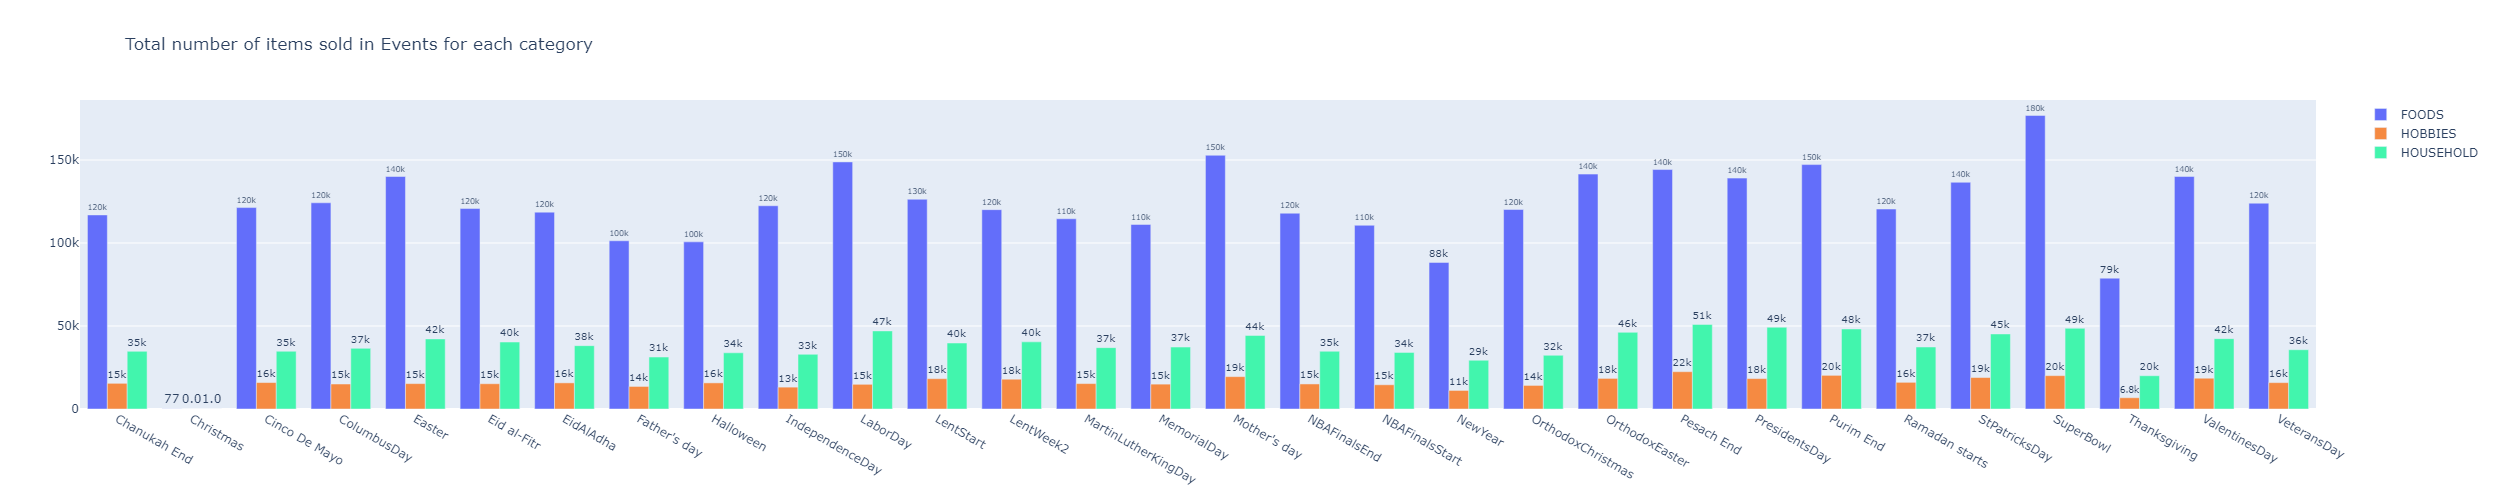

In [ ]:
Image(filename='All_Photos/4.9_Photo.png') 

**Observations-----**
 <font color='green'>
1. We sell Maximum items on Superball Days, Mother's Day, and another Famous Festival.
2. One Strange thing is, On Thanksgiving day we are not selling many Food Items. So Personally I feel people buy products before one day, two days or week Advance. So we need to give importance Before the Festivals Days Also.
3. Maximum we are selling food items as usual.

 ####  <font color='RED'>  4.10 Total Sales on Snap Days Across the State

In [ ]:
Snap =  Sales_Data_Cal_Price[(Sales_Data_Cal_Price['snap_CA'] == 1) | (Sales_Data_Cal_Price['snap_TX'] == 1) | (Sales_Data_Cal_Price['snap_WI'] == 1)]
x1 = Snap[['state_id','cat_id','Number_of_Product_Sold']]
grouped = x1.groupby(['state_id','cat_id'], as_index=False).sum()
print(grouped)

print(grouped)
print("  "*50)
print("**"*50)

x = grouped['state_id'].unique()
y1_food = grouped[(grouped['cat_id'] == 'FOODS')]['Number_of_Product_Sold']
y2_hobbies = grouped[(grouped['cat_id'] == 'HOBBIES')]['Number_of_Product_Sold']
y3_household = grouped[(grouped['cat_id'] == 'HOUSEHOLD')]['Number_of_Product_Sold']



fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1_food,
    name='FOODS',text = y1_food
))
fig.add_trace(go.Bar(
    x=x,
    y=y2_hobbies,
    name='HOBBIES', text = y2_hobbies,
    marker_color='rgb(245, 138, 66)'
))
fig.add_trace(go.Bar(
    x=x,
    y=y3_household,
    name='HOUSEHOLD	', text = y3_household,
    marker_color='rgb(66, 245, 173)'
))
fig.update_layout(barmode='group')
fig.update_layout(title_text='Total number of items sold on Snap Days for each category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()


  state_id     cat_id  Number_of_Product_Sold
0       CA      FOODS              10104638.0
1       CA    HOBBIES               1549100.0
2       CA  HOUSEHOLD               3291941.0
3       TX      FOODS               6915129.0
4       TX    HOBBIES                808832.0
5       TX  HOUSEHOLD               2226490.0
6       WI      FOODS               7292695.0
7       WI    HOBBIES                764164.0
8       WI  HOUSEHOLD               1921462.0
  state_id     cat_id  Number_of_Product_Sold
0       CA      FOODS              10104638.0
1       CA    HOBBIES               1549100.0
2       CA  HOUSEHOLD               3291941.0
3       TX      FOODS               6915129.0
4       TX    HOBBIES                808832.0
5       TX  HOUSEHOLD               2226490.0
6       WI      FOODS               7292695.0
7       WI    HOBBIES                764164.0
8       WI  HOUSEHOLD               1921462.0
                                                                                

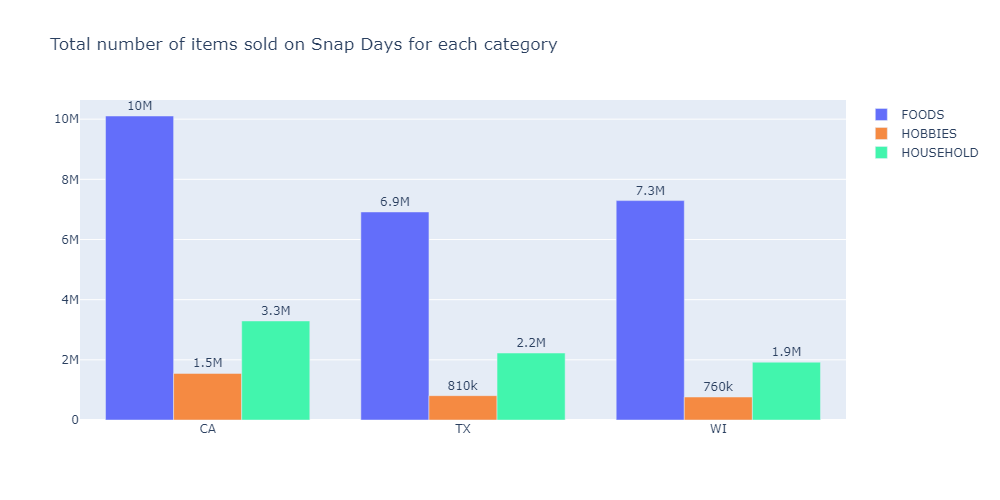

In [ ]:
Image(filename='All_Photos/4.10_Photo.png') 

**Observations-----**
 <font color='green'>
1. In California State People are buying on Snap Days. And People are buying only food Category because Snap is related to food only.
2. Texas and Wisconsin State there is Not much Difference.

 ####  <font color='RED'>  4.11 Total Sales on Each Days Across All State

In [ ]:
x1 = Sales_Data_Cal_Price[['state_id','date','Number_of_Product_Sold']]
grouped = x1.groupby(['state_id','date'], as_index=False).sum()
print(grouped)
print("  "*50)
print("**"*50)


fig = px.line(grouped ,x = 'date', y = 'Number_of_Product_Sold',color = 'state_id' ,title='Total number of products sold in each State')
fig.update_layout(width=1000, height=400)
#fig.show()

     state_id       date  Number_of_Product_Sold
0          CA 2011-01-29                   14195
1          CA 2011-01-30                   13805
2          CA 2011-01-31                   10108
3          CA 2011-02-01                   11047
4          CA 2011-02-02                    9925
...       ...        ...                     ...
5818       WI 2016-05-18                   11043
5819       WI 2016-05-19                   11504
5820       WI 2016-05-20                   12819
5821       WI 2016-05-21                   14734
5822       WI 2016-05-22                   14879

[5823 rows x 3 columns]
                                                                                                    
****************************************************************************************************


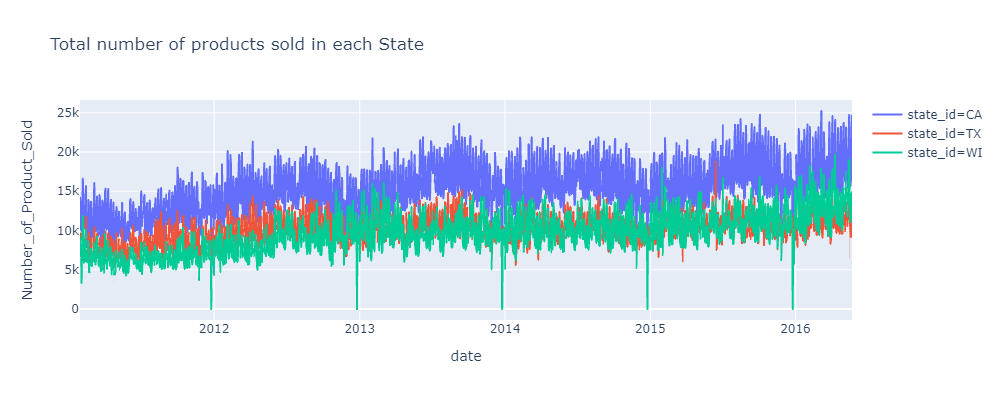

In [ ]:
Image(filename='All_Photos/4.11_Photo.png') 

**Observations-----**
 <font color='green'>
1. California State Sales are Maximum because it's the most populated State in the USA.
2. There is a Clear Upwards Trends.
3. Sales are zero some days. So in some States, they Closed their Stores. 

 ####  <font color='RED'>  4.12 Trend Analysis Using Simple Moving Average

In [ ]:
#13. Simple Moving Across Stores (Weekly,Monthly,Quartely)
# Ref  --->>> https://www.dezyre.com/recipes/apply-functions-in-group-in-pandas-dataframe  ,  # https://plotly.com/python/time-series/


simple_moving_Average_7 = grouped.groupby("state_id")["Number_of_Product_Sold"].apply(lambda x:x.rolling(window=7).mean())
simple_moving_Average_30 = grouped.groupby("state_id")["Number_of_Product_Sold"].apply(lambda x:x.rolling(window=30).mean())
simple_moving_Average_120 = grouped.groupby("state_id")["Number_of_Product_Sold"].apply(lambda x:x.rolling(window=120).mean())
grouped['simple_moving_Average_7'] = simple_moving_Average_7
grouped['simple_moving_Average_30'] = simple_moving_Average_30
grouped['simple_moving_Average_120'] = simple_moving_Average_120

fig = px.line(grouped ,x = 'date', y = 'simple_moving_Average_7',color = 'state_id' ,title='Weekly Simple Moving Average')
fig.update_layout(width=1000, height=400)
fig.show()

fig1 = px.line(grouped ,x = 'date', y = 'simple_moving_Average_30',color = 'state_id' ,title='Monthly Simple Moving Average')
fig1.update_layout(width=1000, height=400)
fig1.show()

fig2 = px.line(grouped ,x = 'date', y = 'simple_moving_Average_120',color = 'state_id' ,title='Quarterly Simple Moving Average')
fig2.update_layout(width=1000, height=400)
fig2.show()

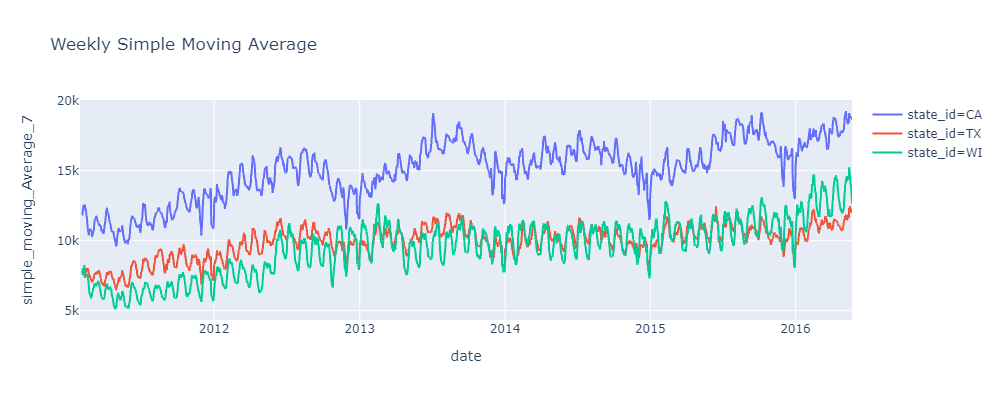

In [ ]:
Image(filename='All_Photos/4.12_Photo.png') 

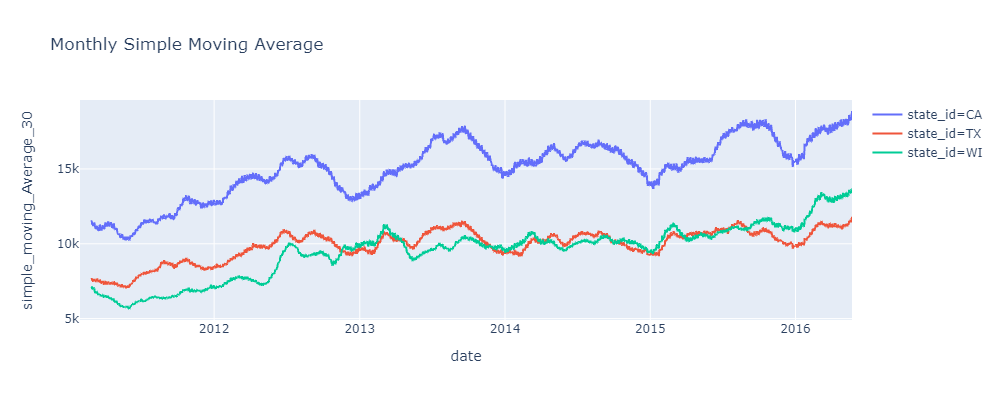

In [ ]:
Image(filename='All_Photos/4.12.1_Photo.png') 

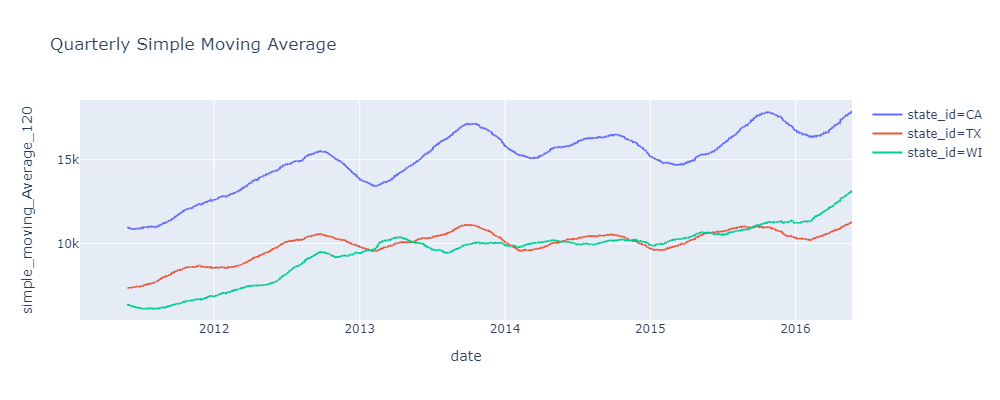

In [ ]:
Image(filename='All_Photos/4.12.2_Photo.png') 

**Observations-----**
 <font color='green'>
1. We Smooth the time series Data using Simple Moving Average.
2. Monthly And Quarterly we Can see an upward Trend
3. California State Sales are Maximum. 

 ####  <font color='RED'>  4.13 Product Wise Analyis

In [ ]:
x1 = Sales_Data_Cal_Price[['item_id','Number_of_Product_Sold']]
grouped = x1.groupby(['item_id'], as_index=False).sum()

z = grouped.sort_values(by=['Number_of_Product_Sold'])

print("Top 5 Least Sold Product ",z.head(5))

print(" "*50)
print("*"*50)

print("Top 5 Least Sold Product ",z.tail(5))

print(" "*50)
print("*"*50)


z11 = Sales_Data_Cal_Price[Sales_Data_Cal_Price['item_id']=='FOODS_3_090']
x1 = z11[['store_id','date','Number_of_Product_Sold']]
grouped = x1.groupby(['store_id','date'], as_index=False).sum()
print("  "*50)
print("**"*50)


grouped = grouped[grouped['date']>='2016-03-01']
fig = px.line(grouped ,x = 'date', y = 'Number_of_Product_Sold',color = 'store_id' ,title='FOODS_3_090 Product_id Sales Pattern Analysis')
fig.update_layout(width=1000, height=400)
fig.show()

print("  "*50)
print("**"*50)

z11 = Sales_Data_Cal_Price[Sales_Data_Cal_Price['item_id']=='HOUSEHOLD_2_101']
x1 = z11[['store_id','date','Number_of_Product_Sold']]
grouped1 = x1.groupby(['store_id','date'], as_index=False).sum()
grouped1 = grouped1[grouped1['date']>='2016-03-01']

fig2 = px.line(grouped1 ,x = 'date', y = 'Number_of_Product_Sold',color = 'store_id' ,title='HOUSEHOLD_2_101  Sales Pattern Analysis')
fig2.update_layout(width=1000, height=400)
fig2.show()


Top 5 Least Sold Product                item_id  Number_of_Product_Sold
2634  HOUSEHOLD_2_101                   593.0
1971    HOBBIES_2_119                   673.0
2708  HOUSEHOLD_2_175                   759.0
2538  HOUSEHOLD_2_005                   782.0
1936    HOBBIES_2_084                   786.0
                                                  
**************************************************
Top 5 Least Sold Product            item_id  Number_of_Product_Sold
1199  FOODS_3_587                402159.0
1167  FOODS_3_555                497881.0
864   FOODS_3_252                573723.0
1198  FOODS_3_586                932236.0
702   FOODS_3_090               1017916.0
                                                  
**************************************************
                                                                                                    
****************************************************************************************************


                                                                                                    
****************************************************************************************************


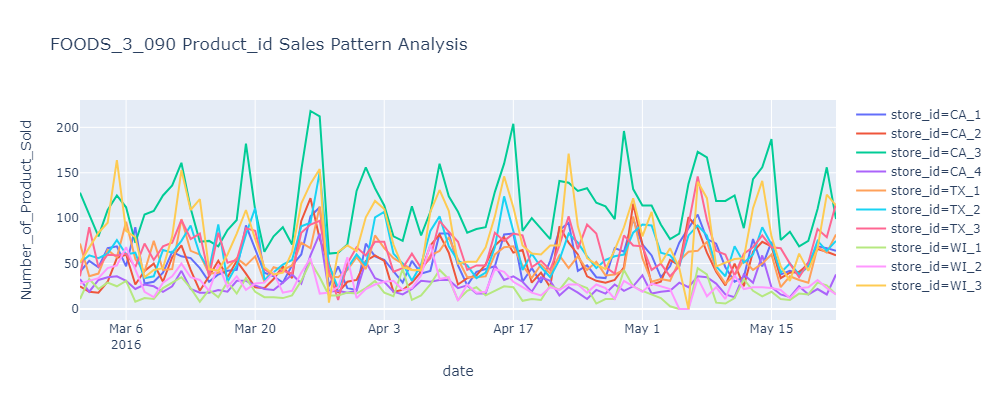

In [ ]:
Image(filename='All_Photos/4.13_Photo.png') 

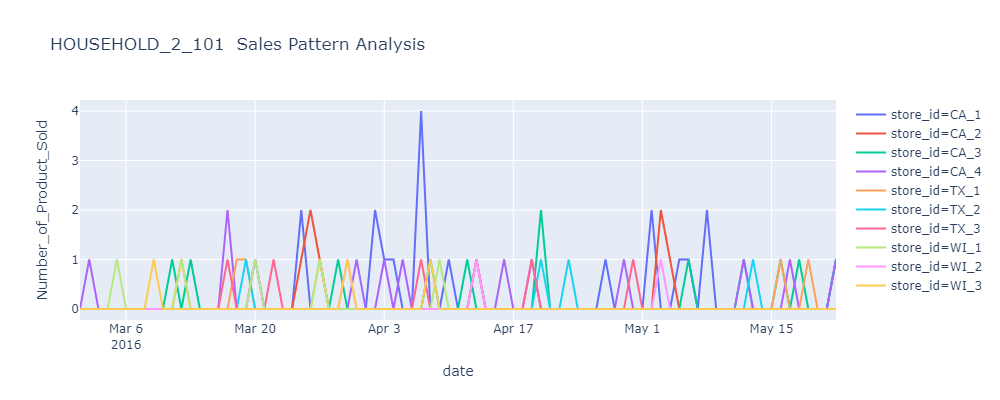

In [ ]:
Image(filename='All_Photos/4.13.1_Photo.png') 

**Observations-----**
 <font color='green'>
1. Top Five Selling Products Belongs to food Category. They may be milk, eggs and shop kind of Product.
2. Top Five Least Selling Product Belong to Household. Might be we recently introduced these products or they may not be famous.
3. We See Lot's of Variation in Different Products So it's a very important Feature.

 ####  <font color='RED'>  4.14 Product Price Analyis

In [ ]:
z22 = Sales_Data_Cal_Price[['store_id','cat_id','sell_price','item_id']]
z11 = z22.groupby(['store_id','cat_id','item_id'], as_index=False)['sell_price'].mean()


fig = px.box(z11, x="store_id", y="sell_price", color="cat_id")
fig.update_layout(title_text='Distribution of prices of different categories in different stores')
fig.show()

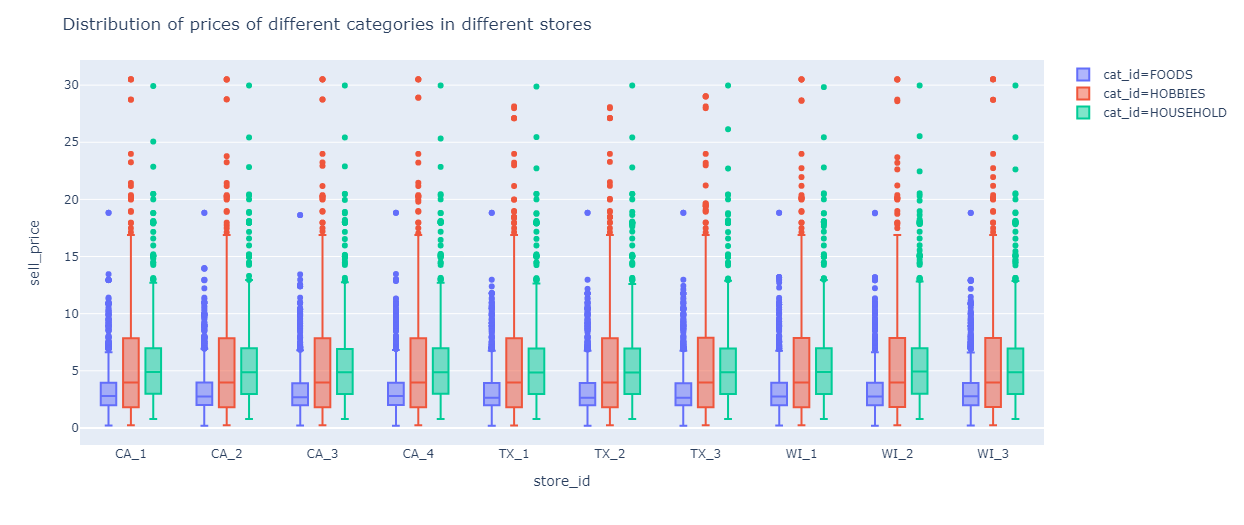

In [ ]:
Image(filename='All_Photos/4.14_Photo.png') 

**Observations-----**
 <font color='green'>
1. FOODS category items have the least price range.
2. HOBBIES category items have the largest price range.
3. The distribution of the price range for all items seems to be very similar for all the stores.

 ####  <font color='RED'>  4.15 Total Revenue of Each Stores
 

In [ ]:
Sales_Data_Cal_Price.head()

id        item_id  ... snap_WI sell_price
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...       0        NaN
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...       0        NaN
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...       0        NaN
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...       0        NaN
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...       0        NaN

[5 rows x 22 columns]

In [ ]:
x = Sales_Data_Cal_Price[['store_id','Number_of_Product_Sold','sell_price']]
x['Revenue'] = x['Number_of_Product_Sold']*x['sell_price']
x= x[['store_id','Revenue']]

total_Revenue = x['Revenue'].sum()


x = x.groupby(['store_id']).sum()
x.reset_index(level=0,inplace=True)
print(x)
print("  "*50)
print("**"*50)

x['Revenue'] = x['Revenue']/total_Revenue

px.bar(x, x="store_id", y="Revenue", color="store_id", title="Store Total Revenue")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



  store_id     Revenue
0     CA_1  22954570.0
1     CA_2  17848176.0
2     CA_3  32699452.0
3     CA_4  12465840.0
4     TX_1  16037555.0
5     TX_2  20893296.0
6     TX_3  18190602.0
7     WI_1  15107582.0
8     WI_2  18132338.0
9     WI_3  17250486.0
                                                                                                    
****************************************************************************************************


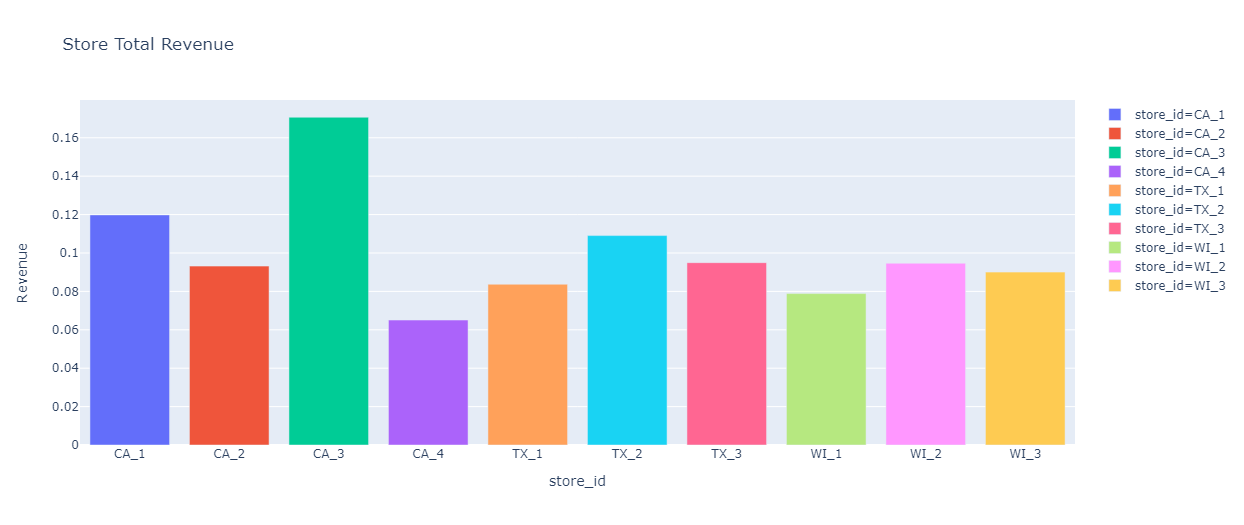

In [5]:
Image(filename='4.15_Photo.png') 

**Observations-----**
 <font color='green'>
1. Total Revenue of CA_3 Store is Maximum.
2. There are not many Revenue between Another Stores.
3. Total Revenue of CA_4 Store is MINIMUM. Might be they open this Store Recently or it is located in Some Remote Area.
4. California is Developing very Fast or Lot's of People Moving From Rural Area to Urban Area.

 ####  <font color='RED'>  4.16 SNap vs Non Snap Days

In [ ]:
df=Sales_Data_Cal_Price[['snap_CA','Number_of_Product_Sold']].groupby('snap_CA').mean().reset_index()
px.bar(df, x="snap_CA", y="Number_of_Product_Sold", color="snap_CA", title="State CA Snap Vs Non Snap")

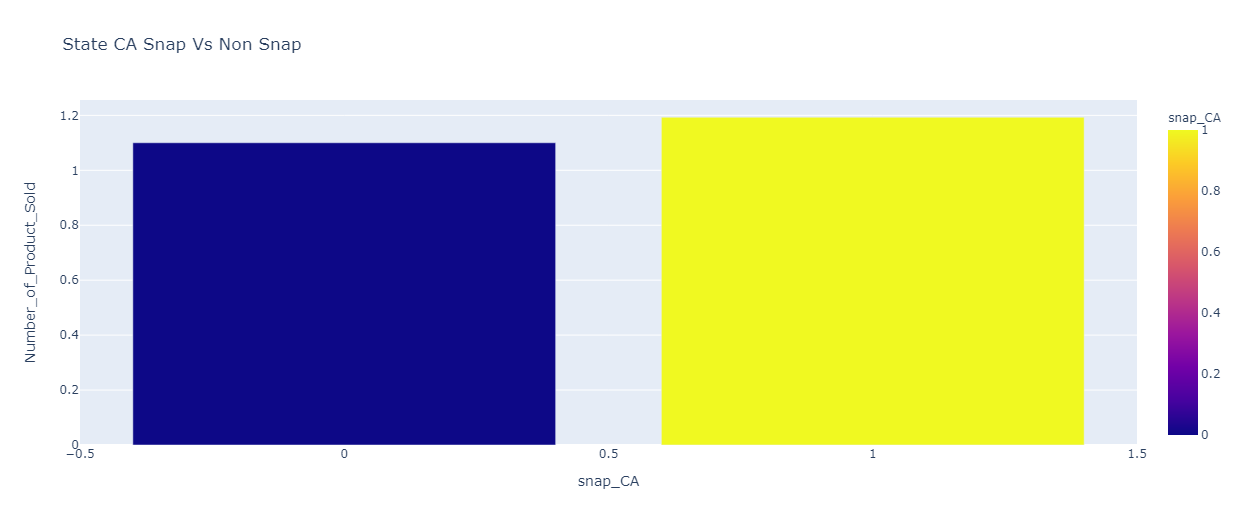

In [6]:
Image(filename='4.16_1_Photo.png') 

**Observations-----**
 <font color='green'>
1. We get that when we provide snap average sales is more than without snap in California.

In [ ]:
df=Sales_Data_Cal_Price[['snap_TX','Number_of_Product_Sold']].groupby('snap_TX').mean().reset_index()
px.bar(df, x="snap_TX", y="Number_of_Product_Sold", color="snap_TX", title="State TX Snap Vs Non Snap")

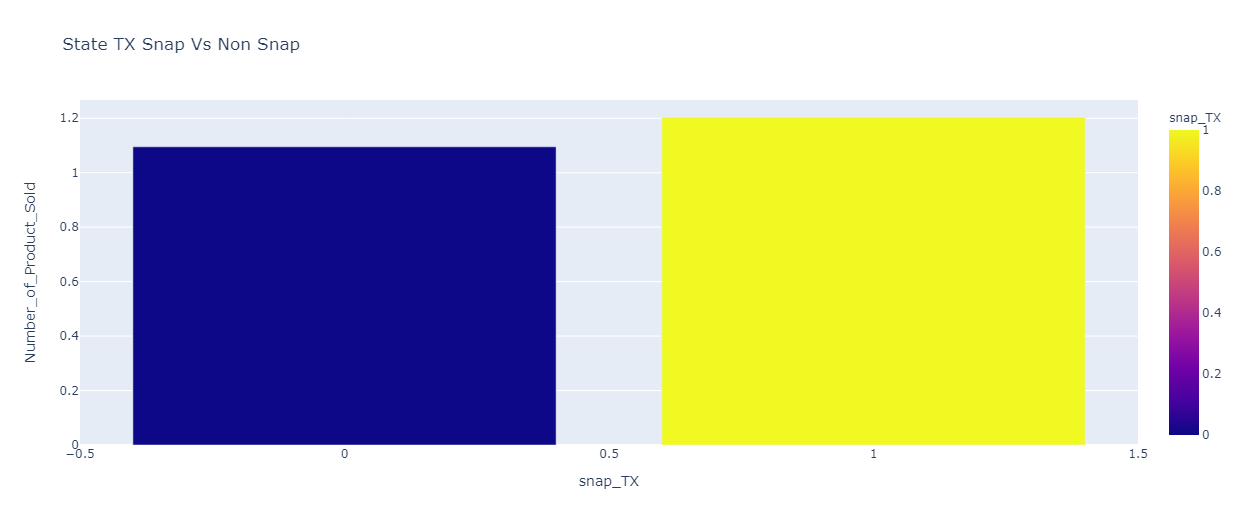

In [7]:
Image(filename='4.16_2_Photo.png') 

**Observations-----**
 <font color='green'>
1. We get that when we provide snap average sales is more than without snap in Texas.

In [ ]:
df=Sales_Data_Cal_Price[['snap_WI','Number_of_Product_Sold']].groupby('snap_WI').mean().reset_index()
px.bar(df, x="snap_WI", y="Number_of_Product_Sold", color="snap_WI", title="State WI Snap Vs Non Snap")

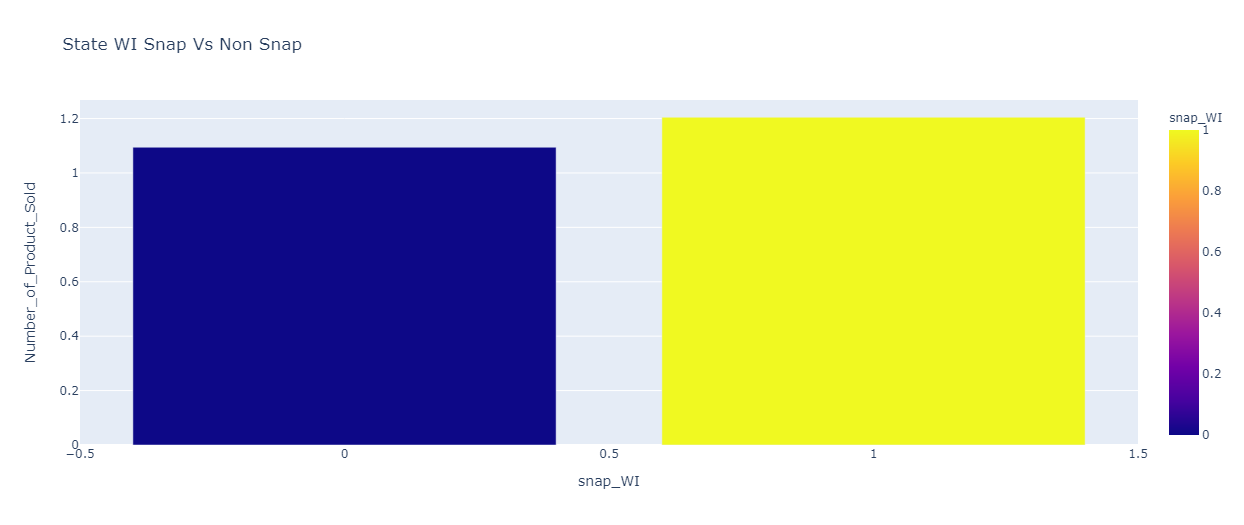

In [8]:
Image(filename='4.16_3_Photo.png') 

**Observations-----**
 <font color='green'>
1. We get that when we provide snap average sales is more than without snap in Winscoin.